# TikTok Reviews Sentiment Analysis

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Part1: Load data

In [2]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")

ttData = pd.read_csv("datasets/tiktok_google_play_reviews.csv")
ttData.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\atplu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
C:\Users\atplu\AppData\Local\Temp\ipykernel_6140\2601780220.py:4: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  ttData = pd.read_csv("datasets/tiktok_google_play_reviews.csv")


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,68ccaec8-1415-4301-a85e-3004679a3a83,Cassie Moore,https://play-lh.googleusercontent.com/a/ALm5wu...,No words,5,0,27.1.3,2022-11-29 21:55:37,NaN,NaN
1,d84cbfd3-6aa3-485c-aaf9-c5dca27dc966,Kaleb Plummer,https://play-lh.googleusercontent.com/a-/ACNPE...,Great fun app so far!,5,0,NaN,2022-11-29 21:55:04,NaN,NaN
2,96618aa1-31e5-4259-8649-89b75d962f00,Rylee Maher,https://play-lh.googleusercontent.com/a/ALm5wu...,The app would get a higher rating but I litera...,1,0,27.1.3,2022-11-29 21:54:48,NaN,NaN
3,078c0bda-598b-474e-a04e-d7cb3e6f6301,Kittykatelyn Romilly,https://play-lh.googleusercontent.com/a-/ACNPE...,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,0,NaN,2022-11-29 21:54:35,NaN,NaN
4,8e68c5cd-b12a-4206-a8da-6bfdbff44ae3,Loveness Malenga,https://play-lh.googleusercontent.com/a-/ACNPE...,Pictures and record,5,0,NaN,2022-11-29 21:54:21,NaN,NaN


### Part2: Preprocessing

select features

In [3]:
ttData = ttData[['content', 'score']]
ttData.head()

,content,score
0,No words,5
1,Great fun app so far!,5
2,The app would get a higher rating but I litera...,1
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5
4,Pictures and record,5


remove null values

In [19]:
ttData.isnull().sum()

content    16
score       0
dtype: int64

In [20]:
ttData = ttData.dropna()

clean the text in the content column

In [31]:
stopword = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = ''.join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = ''.join(text)
    return text
ttData['content'] = ttData['content'].apply(clean)


C:\Users\atplu\AppData\Local\Temp\ipykernel_6140\2733911264.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttData['content'] = ttData['content'].apply(clean)


<AxesSubplot:xlabel='score', ylabel='count'>

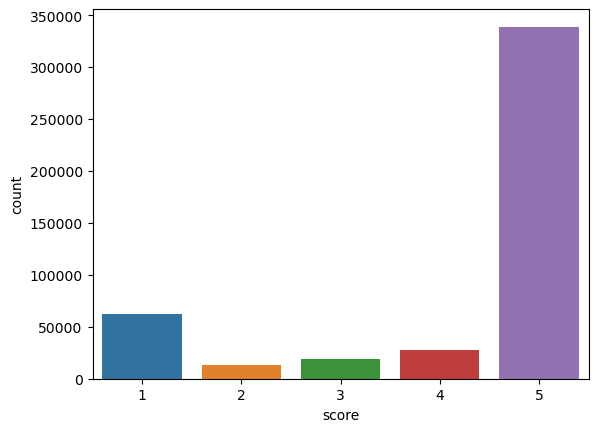

In [34]:
sns.countplot(data=ttData, x='score')

Look for kind of words the users use in the reviews

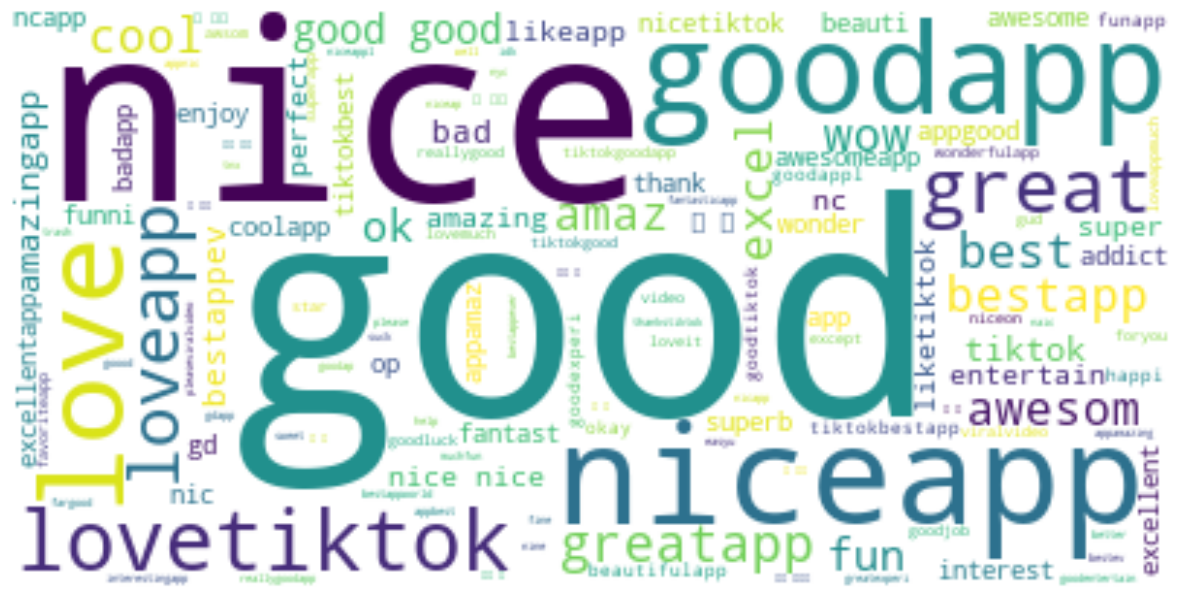

In [37]:
text = ' '.join(i for i in ttData.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                    background_color='white').generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Add three more columns by calculateing the sentiment scores

In [39]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
ttData['positive'] = [sentiments.polarity_scores(i)['pos'] for i in ttData['content']]
ttData['negative'] = [sentiments.polarity_scores(i)['neg'] for i in ttData['content']]
ttData['neutral'] = [sentiments.polarity_scores(i)['neu'] for i in ttData['content']]
ttData = ttData[['content', 'positive', 'negative', 'neutral']]
ttData.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\atplu\AppData\Roaming\nltk_data...
C:\Users\atplu\AppData\Local\Temp\ipykernel_6140\1069049562.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttData['positive'] = [sentiments.polarity_scores(i)['pos'] for i in ttData['content']]
C:\Users\atplu\AppData\Local\Temp\ipykernel_6140\1069049562.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttData['negative'] = [sentiments.polarity_scores(i)['neg'] for i in ttData['content']]
C:\Us

,content,positive,negative,neutral
0,word,0.0,0.0,1.0
1,greatfunappfar,0.0,0.0,1.0
2,appwouldgethigherratingliterallycantsignsecond...,0.0,0.0,1.0
3,wishcouldgivepercentratinglove💕😘,0.0,0.0,1.0
4,picturesrecord,0.0,0.0,1.0


Look at the kind of words people use in the positive reviews

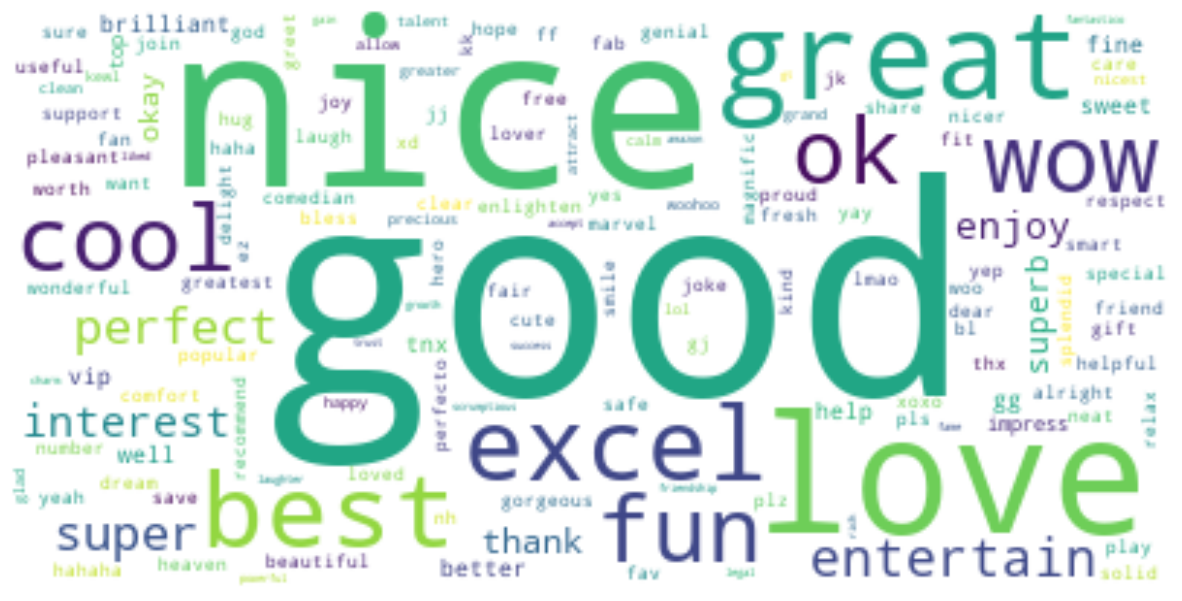

In [41]:
positive = ' '.join([i for i in ttData['content'][ttData['positive'] > ttData['negative']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(positive)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Look at the kind of words people use in the negative reviews

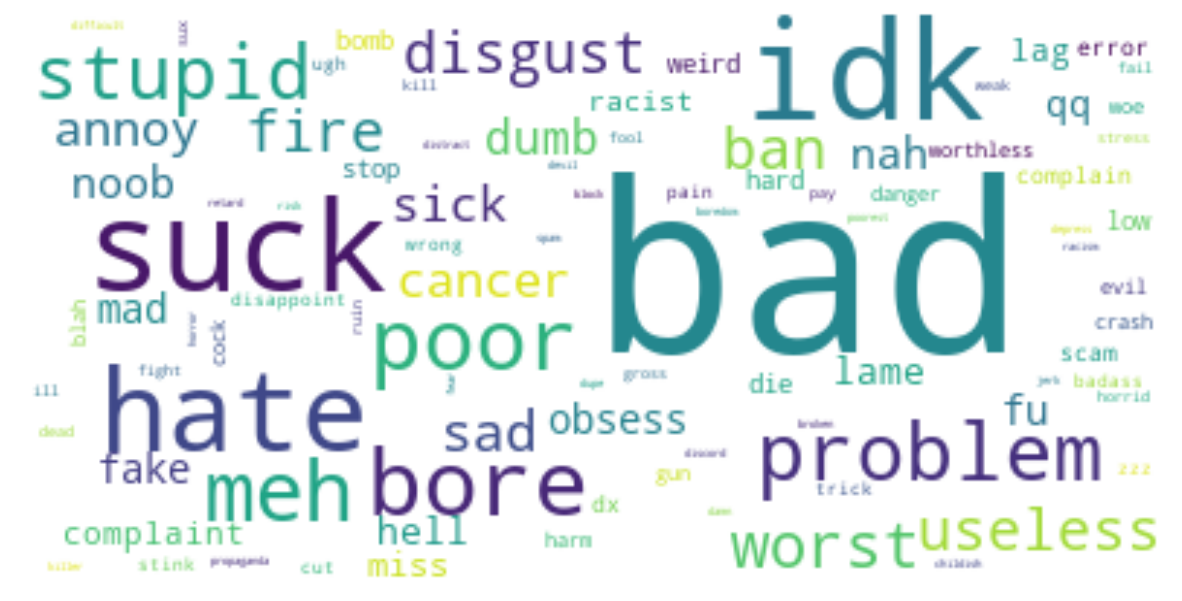

In [42]:
negative = ' '.join([i for i in ttData['content'][ttData['positive'] < ttData['negative']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(negative)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()